# Projet Master HPC-IA Mines ParisTech
### _Cours de probas-stats avec le Professeur Miguel Munoz Zuniga_

## **Problème 1** : Comparaison entre les méthodes des moments et de vraissemblance maximale

Soit la variable aléatoire X suivant comme fonction de densité de probabilité :
$
f(x) = \frac{1}{\alpha}e^{-\frac{x-m}{\alpha}}e^{-e^{-\frac{x-m}{\alpha}}}
$
Avec $m$ et $\alpha$ > 0 deux paramètres inconnus.

### 1. Vérifions que $f$ est une fonction de densité de probabilité valide.
Pour cela, nous devons prouver que :
$$
\int_{-\infty}^{\infty} f(x) \; dx = 1
$$
- Posons : 
    - $v(x) = -\frac{x-m}{\alpha}$
    - $u(x) = -e^{-\frac{x-m}{\alpha}} = -e^{v(x)}$
- Nous avons donc : 
  - $v'(x) = \frac{1}{\alpha}$
  - $u'(x) = -v'(x)e^{v(x)}$
- Ainsi :
  - $f(x) = u'(x)e^{u(x)}$
- Nous pouvons donc trouver facilement une primitive, qui nous aidera dans le calcul de l'intégrale :
  - $F(x) = e^{-e^{-\frac{x-m}{\alpha}}} = e^{u(x)}$

Revenons au problème initial donc prouver que $\int_{-\infty}^{\infty} f(x) \; dx = 1$ :
$$
\begin{align}
\int_{-\infty}^{\infty} f(x) \; dx &= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} [f(x)]_a^b \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} F(b) - F(a) \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{-e^{-\frac{b-m}{\alpha}}} - e^{-e^{-\frac{a-m}{\alpha}}} \\
\text{A l'infini, }\alpha\text{ et }m&\text{ sont négligeable, donc :} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{-e^{-b}} - e^{-e^{-a}} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} e^{0} - e^{-\infty} \\
&= \lim\limits_{\substack{a \rightarrow -\infty \\ b \rightarrow +\infty}} 1 - 0 \\
&= 1 \\
\end{align}
$$

**La fonction $f$ est donc bien une fonction de densité de probabilité valide.**

Maintenant, confirmons cela empiriquement avec python. Pour cela, tout d'abord, affichons la fonction de densité en jouant sur les paramètres $\alpha$ et $m$ :

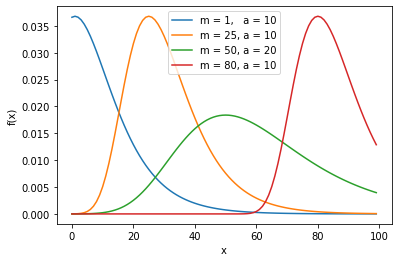

In [45]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import itertools 
from math import *

_alpha = 10
_m = 25

def f(x, alpha=_alpha,m=_m) :
    return (1/alpha) * exp(-((x-m)/alpha)) * exp(-exp(-((x-m)/alpha)))

alphas = [10, 10, 20, 10]
ms = [1, 25, 50, 80]

xs = range(0, 100)
ys = []
for i in range(len(alphas)) :
    a = alphas[i]
    m = ms[i]
    ys.append([f(x,alpha=a,m=m) for x in xs])


plt.plot(xs,ys[0], label="m = 1,   a = 10")
plt.plot(xs,ys[1], label="m = 25, a = 10")
plt.plot(xs,ys[2], label="m = 50, a = 20")
plt.plot(xs,ys[3], label="m = 80, a = 10")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Maintenant, en calculant numériquement l'aire sous la courbe entre une borne de plus en plus grande, nous voyons vite que le résultat converge vers 1 :

In [46]:
b_inf = [-1, -10, -100, -1000]
b_sup = [1, 10, 100, 1000]

res = [quad(f, inf, sup) for (inf, sup) in zip(b_inf, b_sup)]

for r, inf, sup in zip(res, b_inf, b_sup) :
    print("Aire sous la courbe de {} à {} : {}".format(inf, sup, r[0]))
# print('aire sous la courbe de -1000 a 1000 : ', res)

Aire sous la courbe de -1 à 1 : 1.4897481867184675e-05
Aire sous la courbe de -10 à 10 : 0.011314286380455472
Aire sous la courbe de -100 à 100 : 0.999447068552818
Aire sous la courbe de -1000 à 1000 : 0.9999999999999998


### 2. Estimateur de $m$ et $\alpha$ basé sur la **méthode des moments**.
Dans cette question, nous nous intéressons à un échantillon aléatoire $(X_i)_{i = 1,\dots,\ n}$ de taille $n$.

Comme nous avons deux paramètres à estimer, nous allons calculer les moments $\hat{m}_1$ et $\hat{m}_2$, soit respectivement $\mathbb{E}(X)$ et $\mathbb{E}(X^2)$. Ensuite, nous allons comparer ces deux moments à $\overline{X}$ et $\overline{X}_2$, soit respectivement la moyenne empirique des $X_i$ et des $X_i^2$.

Enfin, nous pourrons résoudre le système à deux inconnues $\hat{m} = m(\theta)$

#### - Calcul des moments
afin de determiner le moment d'ordre 1 et le moment d'ordre 2 on utilise 
la méthode MGF Momment Generating functions :

1) Momment d'ordre 1 

$
f(x)=\frac{1}{\alpha} e^{-\left(\frac{x-m}{\alpha}\right)} e^{-e^{-\left(\frac{x-m}{\alpha}\right)}}\\
\int_{-\infty}^{+\infty} f(x) d x=\int_{-\infty}^{+\infty}-e^{-y} d y \quad x, m \in \mathbb{R} ; \alpha>0\\
=\int_{0}^{\infty} e^{-y} d y=[-e^{-y}]_{0}^{\infty}=0-(-1)=1\\
\text { (*) } y=e^{-\left(\frac{x-m}{\alpha}\right)} \quad d y=\left(\frac{-1}{\alpha}\right) e^{-\left(\frac{x-m}{\alpha}\right)} d x\\
\text {  MGF : Momment Generating functions }\\
M_{x}(t)=\int_{-\infty}^{0} e^{tx} e^{-y} d y\\
\text { (*) } \Rightarrow x=m-\alpha \log (y)\\
M_{x}(t)=\int_{-\infty}^{0} e^{t\left(m-\alpha \log (y)\right)} e^{-y} d y\\
=\int_{-\infty}^{0} e^{t m} e^{-t \alpha \log (y)} e^{-y} d y\\
or \quad \Gamma: x \longmapsto \int_{0}^{+\infty} t^{x-1} e^{-t} \mathrm{~d} t\\
\Rightarrow M_{x}(t)=\left.e^{-t m}\right|_{0} ^{\infty} y^{-\alpha t} e^{-y} d y=e^{t m} \Gamma(1-\alpha t)\\
\left.E(x)=\frac{\partial M_{x}(t)}{\partial t}\right|_{t=0}=\left[m e^{t m} \Gamma(1-\alpha t)+e^{t m}\Gamma(1-\alpha t)(-\alpha)\right]_{t=0}
$
$$
=m\Gamma(1) \alpha -\Gamma^{\prime}(1)=m+\alpha \gamma
$$
sachant que $\Gamma(1)=1$
avec $\gamma$: Euler-maschronic constante $=0,577$

1.1. Autre approche : Methode directe de calcul du moment d'ordre 1

$$
\begin{array}{l}
E(x)=\int_{-\infty}^{+\infty} x f(x) d x=\int_{-\beta}^{+\infty} \frac{x}{\alpha} e^{-\left(\frac{x-m}{\alpha}\right)} e^{-\left(\frac{x-m}{\alpha}\right)} d x\\
soit:\\
y=e^{-\left(\frac{x-m}{\alpha}\right)} \quad \Rightarrow x=m-\alpha \log (y)\\
 d y=e^{-\left(\frac{x-m}{\alpha}\right)} d x\\
\Rightarrow E(x)=\int_{0}^{\infty}(m-\alpha \log (y)) e^{-y} d y\\
=m-\alpha \int_{0}^{\infty} \frac{\partial}{\partial \beta}\left[y^{\beta} e^{-y}\right]_{\beta=0}=m-\alpha \frac{\partial}{\partial \beta}\left[\int_{0}^{\infty} y^{\beta} e^{-y} d y\right]_{\beta=0}\\
=m-\alpha \frac{\partial}{\partial \beta}[\Gamma(\beta+1)]_{\beta=0}=m-\alpha \Gamma^{\prime}(\beta+1) | _{\beta=0}\\
=m-\alpha \Gamma^{\prime}(1)=m+\alpha \gamma
\end{array}
$$

On tombe bien sur le même résultat pour le moment d'ordre 1 avec les deux méthodes différentes.

2) Moment d'ordre 2 :

$\begin{aligned}
E\left(x^{2}\right) &=\left.\frac{\partial^{2} M_{x}(t)}{\partial^{2} t}\right|_{t=0} \\
&=m\left[m e^{t m}\left[(1-\alpha t)+e^{t m} \Gamma^{\prime}(1-\alpha t)(-\alpha)\right]\right.\\
&-\alpha\left[m e^{t m} \Gamma^{\prime}(1-\alpha t)+e^{t m}\Gamma^{\prime \prime}(1-\alpha t)(-\alpha)\right|_{t=0}\\
=& m^{2}-m \alpha \Gamma^{\prime}(1)-m \alpha \Gamma^{\prime}(1)+\alpha^{2}\Gamma^{\prime \prime}(1)
\end{aligned}$
$\begin{array}{l}
\operatorname{Var}(x)=E\left(x^{2}\right)-E(x)^{2} \\
\quad=m^{2}-2 m \alpha \Gamma(1)+\alpha^{2} \Gamma^{\prime \prime}(1)-\left(m-\alpha \Gamma^{\prime \prime}(1)\right)^{2} \\
\quad=\alpha^{2} \Gamma^{\prime \prime}(1)-\alpha^{2} \Gamma^{\prime}(1)^{2} \\
\text { Soit } \\
\text { (1) } \frac{\partial \log \Gamma(x)}{\partial x}=\frac{\Gamma^{\prime}(x)}{\Gamma(x)}=\psi(x) \\
\text { (2) } \Gamma^{\prime}(x)=\Gamma(x) \psi(x) \\
\text { (3) } \Gamma^{\prime \prime}(x)=\Gamma^{\prime}(x) \psi(x)+\Gamma(x) \psi^{\prime}(x) \\
alors\\
\operatorname{Var}(x)=\alpha^{2}\left[\Gamma^{\prime}(1) \psi(1)+\Gamma(1) \cdot \psi(1)-\Gamma(1) \psi^{2}(1)\right] \\
or \quad\psi(1)=\frac{\Gamma^{\prime}(1)}{\Gamma(1)}\Rightarrow \psi(1)=\Gamma^{\prime}(1)\\ 
\Rightarrow \operatorname{Var}(x) =\alpha^{2} \psi^{\prime}(1)=\alpha^{2} \frac{\pi^{2}}{6}
\end{array}$

On a donc :

$m_1 = m+\alpha \gamma$ <br>
$m_2 = \alpha^{2} \frac{\pi^{2}}{6}$

#### - Calcul des moyennes empiriques

$$
\hat{m}_1 = \frac{1}{N}\sum_{i = 1}^{N} x_i \\
\hat{m}_2 = \frac{1}{N}\sum_{i = 1}^{N} x_i^2
$$

#### - Résolution du système
Maintenant que nous avons nos moments empiriques et théoriques, nous allons résoudre le système $\begin{cases} \hat{m}_1 = m_1 \\ \hat{m}_2 = m_2 \end{cases}$ pour déterminer une valeur de $\alpha$ et $m$

$$
\begin{array}{l}
Var(X)=\hat{\alpha}^{2} \frac{\pi^{2}}{6}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}\\
\Rightarrow\hat{\alpha}=\sqrt{\frac{6}{\pi^{2}} \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}}\\
\\
E(x)=\hat{m}+\alpha \gamma=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}\\
\Rightarrow\hat{m}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}-\hat{\alpha} \gamma\\
\Rightarrow\hat{m}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}-\sqrt{\frac{6}{\pi^{2}} \frac{1}{n} \sum_{i=1}^{n} x_{1}^{2}}.\gamma
\end{array}
$$


<!-- ### 3. Estimateur de $m$ et $\alpha$ basé sur le **maximum de vraissemblance**. -->
### 3. Calcul du **maximum de log-vraissemblance** en fonction de $m$ et $\alpha$.
Sur un échantillon aléatoire $(X_i)_{i = 1,\dots,\ n}$ de taille $n$, nous allons nous intérésser à la log-vraissemblance afin d'estimer les paramètres $m$ et $\alpha$.


a) Estimation de la moyenne $\hat{m}$ par la méthode de Maximum de la Vraisemblance :

$$
\log f\left(x_{1}, x_{n} \mid m, \alpha\right)=\log  \prod_{i=1}^{n} f_{x_{i}}(x, m, \alpha) \\
=\sum_{i=1}^{n} \log f\left(x_{i} \mid m, \alpha\right)=\sum_{i=1}^{n} \log \left(\frac{1}{\alpha} e^{-\left(\frac{x_{i}-m}{\alpha}\right)-e^{-e}-\frac{\left(x_{i}-m\right)}{\alpha}}\right) \\
=\sum_{i=1}^{n}\left\{\log \left(\frac{1}{\alpha}\right)+\log \left[e^{-\left(\frac{x_{i}-m}{\alpha}\right)}\right]+\log \left[e^{-e^{-\left(\frac{x_{i}-m}{\alpha}\right)}}\right]\right\} \\
=\sum_{i=1}^{n}\left\{\log(1)-\log (\alpha)-\left(\frac{x_{i}-m}{\alpha}\right)-e^{-\left(\frac{x_{i}-m}{\alpha}\right)}\right\} \\
=\sum_{i=1}^{n}\left\{-\log (\alpha)-\frac{x_{i}}{\alpha}+\frac{m}{\alpha}-e^{-\left(\frac{x_{i}-m}{\alpha}\right)}\right\} \\
\\
L(\alpha, m)=n log (\alpha)-\sum_{i=1}^{n} \frac{x_{i}}{\alpha}+\frac{n m}{\alpha}-e^{\left(\frac{m}{\alpha}\right)} \sum_{i=1}^{n} e^{} \frac{\left(x_{i}\right)}{\alpha}\\
\frac{\partial}{\partial m}  L(\alpha, m)=0 \\
\Rightarrow \frac{n}{\alpha}-\frac{1}{\alpha} e^{\left(\frac{\hat{m}}{\alpha}\right)} \sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\alpha}\right)}=0\\
\Rightarrow \frac{n}{\alpha}=\frac{1}{\alpha} e^{\left(\frac{\hat{m}}{\alpha}\right)} \sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\alpha}\right)}\\
$$

$$
\Rightarrow \frac{n}{\sum_{i=1}^{n} e^{\left(-x_{i}\right)}}=e^{\left(\frac{\hat{m}}{\alpha}\right)} \Rightarrow \log \left(\frac{n}{\sum_{i=1}^{n} e^{\left(\frac{x_{i}}{\alpha}\right)}}\right)=\frac{\hat{m}}{\alpha}\\
\Rightarrow \hat{m}=\alpha \log \left(\frac{n}{\sum_{i=1}^{n} e\left(-\frac{x_{i}}{\alpha}\right)}\right)\\

\Rightarrow \hat{m}=\alpha \log \left(\frac{n}{\sum_{i=1}^{n} e\left(-\frac{x_{i}}{\alpha}\right)}\right)\\

\Rightarrow \hat{m}=-\alpha \log \left(\frac{1}{n} \sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\alpha}\right)}\right)\\
$$


b) Estimation de la variance $\hat{\alpha}$ par la méthode de Maximum de la Vraisemblance :


$$
\frac{\partial}{\partial \alpha}  L(\alpha, m)=\frac{\partial}{\partial \alpha}\left(-n \log (\alpha)-\sum_{i=1}^{n} \frac{x_{i}}{\alpha}+\frac{n m}{\alpha}-e^{\left(\frac{m}{\alpha}\right)} \sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\alpha}\right)}\right)=0
$$

On remplace $m$ par $\hat{m}$ :

$$
\Rightarrow -n\hat{\alpha}+n \bar{x}+n \hat{\alpha} \log \left(\frac{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}{n}\right)-\left[\hat{\alpha} \log \left(\frac{\sum_{i=1}^{n} e^{\left(\frac{-x_{i}}{\alpha}\right)}}{n}\right)n\left(\frac{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}\right)\right.
\left.+\frac{n}{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right).}}\left[\sum_{i=1}^{n} x_{i} e\left(\frac{-x_{i}}{\hat{\alpha}}\right)\right]\right]=0 \\

\Rightarrow \alpha-\bar{x}+\frac{\sum_{i=1}^{n} x_{i}e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}=0
$$

En utilisant la méthode de Gauss Newton :

$\alpha_{N+1}=\alpha_{N}-\frac{f\left(\alpha_{N}\right)}{f^{\prime}\left(\alpha_{N}\right)}$


Soit $\quad f(\alpha)=\alpha-\bar{x}+\frac{\sum_{i=1}^{n} x_{i}e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}{\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}}$

$f^{\prime}\left(\alpha\right)=1+\frac{\left[\sum_{i=1}^{n} e\left(\frac{-x_{i}}{\alpha}\right)\right]\left[\left(\frac{x_{i}}{\alpha}\right)^{2} e\left(-\frac{x_{i}}{\alpha}\right)\right]-\left[\sum_{i=1}^{n} x_{i} e^{\left(-\frac{x_{i}}{\alpha}\right)}\right]\left[\sum_{i=1}^{n} \frac {x_{i}}{\alpha^{2}} e\left(-\frac{x_{i}}{\alpha}\right)\right]}{\left[\sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\alpha}\right)}\right]^{2}}$

Etape 1 : il faut estimer ${\alpha}$ avec $\hat{\alpha}$ en utilisant Newton Raphson
On va utiliser la méthode de Newton Raphson pour trouver une solution qui converge vers $\hat{\alpha}$

Pour cela, nous allons utiliser la [fonction de scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html), avec $f$, $f'$, et en argument supplémentaire les $N$ $x_i$

In [85]:
import numpy as np
from scipy import optimize 

def func(alpha, xi) :
    m = np.mean(xi)
    sum_1 = 0
    sum_2 = 0
    
    for x in xi :
        sum_1 += x*exp(-x/alpha)
        sum_2 += exp(-x/alpha)    
    
    return alpha - m + sum_1/sum_2

def func_prime(alpha, xi):
    
    left_1  = 0
    left_2  = 0
    right_1 = 0
    right_2 = 0
    down    = 0
    
    for x in xi :
        left_1  += exp(-x/alpha)
        left_2  += ((x/alpha)**2)*exp(-x/alpha)
        right_1 += x*exp(-x/alpha)
        right_2 += ((x/alpha**2))*exp(-x/alpha)
        down    += exp(-x/alpha)
    
    up   = left_1*left_2 - right_1*right_2
    down = down**2
     
    frac = up/down
    return 1 + frac

xs = np.linspace(0, 100)
x0 = 1

r = optimize.newton(func, x0, args=(xs,), fprime=func_prime)

print("r = ", r)
print("f(r) = ", func(r, xs))



r =  26.63458415275892
f(r) =  0.0


Etape 2 : On utilise $\hat{\alpha}$ pour estimer $\hat{m}$
Pour cela, on remplace $\hat{\alpha}$ par la valeur trouvée à l'aide de Newton Raphson dans : 
$$ \hat{m}=-\hat{\alpha} \log \left(\frac{1}{n} \sum_{i=1}^{n} e^{\left(-\frac{x_{i}}{\hat{\alpha}}\right)}\right)$$

In [86]:
sum = 0
a   = r
n   = len(xs)

for x in xs :
    sum += exp(-x/a)

m_hat = -a*log(sum/n)

print("m_hat = ", m_hat)

m_hat =  35.34460027913719


Ici, nous avons pris $N = 100$

### 4. Etude numérique de la convergence des estimateurs
Dans cette question, nous nous intéressons à la convergences des différents estimateurs proposés : à l'aide de la méthode des moments, et à l'aide du maximum de vraissemblance.
Nous allons étudier la convergence de $m$ et $\alpha$ en fonction de la taille $n$ de l'échantillon.


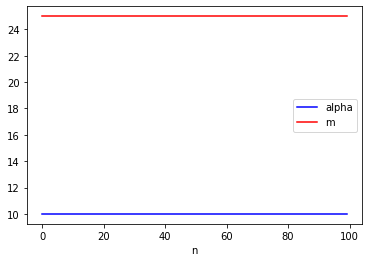

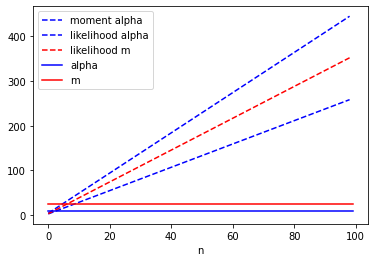

In [95]:
N = 1000
_euleur = 0.577

def moment_alpha(xs, n) :
    sum = 0
    
    for x in xs :
        sum += x**2
        
    return sqrt((6/pi**2) * (sum/n))

def moment_m(xs, n) :
    sum_1 = 0
    sum_2 = 0

    for x in xs :
        sum_1 += x**2
        sum_2 += (x**2)*_euleur

    return sum_1/n - sqrt((6/pi**2)*(sum_2/n))

def likelihood_alpha(xs) :
    return optimize.newton(func, 1, args=(xs,), fprime=func_prime)

def likelihood_m(xs, n, a) :
    sum = 0
    
    for x in xs :
        sum += exp(-x/a)

    return -a*log(sum/n)

m_as = []
m_ms = []
l_as = []
l_ms = []

for n in range(10, N, 10) :
    xs = range(0, n)
    sample = [f(x,alpha=a,m=m) for x in xs]
    
    m_as.append(moment_alpha(xs, n))
    m_ms.append(moment_m(xs, n))

    a = likelihood_alpha(xs)
    l_as.append(a)
    l_ms.append(likelihood_m(xs, n, a))
    
    
alphas = np.full(N//10, _alpha)
ms = np.full(N//10, _m)

plt.figure(1)
plt.plot(alphas, '-b', label="alpha")
plt.plot(ms, '-r', label="m")
plt.xlabel("n")
plt.legend()

plt.figure(2)
plt.plot(m_as, '--b', label="moment alpha")
# plt.plot(m_ms, '--r', label="moment m")
plt.plot(l_as, '--b', label="likelihood alpha")
plt.plot(l_ms, '--r', label="likelihood m")
plt.plot(alphas, '-b', label="alpha")
plt.plot(ms, '-r', label="m")
plt.xlabel("n")
plt.legend()

Comme nous pouvons le constater, nous ne sommes pas tombés sur une solution qui converge malgré nos calculs. Cependant, nous avons essayé d'appliquer la méthodologie du début à la fin et avons compris la logique.

Pour rappel, ici $\alpha = 10$ et $m = 25$